# Motivation and Data:
The dataset which I chose to work for my first capstone project comes from the webpage of Y Combinator , YC (https://www.ycombinator.com), which is a seed funding company in Bay Area for early-stage start-ups. Airbnb, Dropbox, Reddit are among the successful startups which were initially financed by YC. I have been always fascinated by the competition and success of start-ups, especially the tech ones, so I found the best opportunity to study more about it while doing my capstone project. To gather my data, I web scarped and merged three pages: 1) list of all startup for batches of summer and winter, 2) list of all female team start-ups, and 3) list of startups which have at least one female founder. My data include information for 13 years, from the first batch in spring 2005 to the last batch in spring 2018. Main features of the dataset are start-up name, batch season and year, having at least one female founder, all female team. The html files, parsing codes, and final dataset are all available on my github page
https://github.com/liunai7/ThinkfulProjects/blob/master/parsing_yc.py

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df= pd.read_csv("/Users/Liuna/Desktop/Thinkful/unit4/capstone1/new_round/final_data.csv")

In [3]:
#dimension of data
df.shape

(1775, 4)

In [4]:
#list of columns
list(df)

['name', 'batch', 'female_founder', 'all_female_team']

In [5]:
#type of variables: string or numbers
df.dtypes

name                object
batch               object
female_founder     float64
all_female_team    float64
dtype: object

In [6]:
#transforming string to numerical value by ".numeric"
df['female_founder']=pd.to_numeric(df['female_founder'], errors = 'coerce')
df['all_female_team']=pd.to_numeric(df['all_female_team'], errors = 'coerce')

#filling missing values by zero
df= df.fillna(0)

#extracting start_up names: names are inside of teh html tags
df['name_2']= df['name'].str.replace('<td class="name">','').str.replace('</td>',' ')
df['name_3']= df['name_2'].str.replace('<a href=','').str.split("-->").str[1].str.replace("<!-- /react-text","")
df['start_up_name']=df['name_3'].fillna(df['name_2'])

#extracting batch season and year
df['batch_season']=df['batch'].str[0].replace('s','summer').str.replace('w','winter')    
df['batch_year']=df['batch'].str[1:] 

df['count_year']= df.groupby('batch_year')['batch_year'].transform('count')
df['count_batch']= df.groupby('batch')['batch'].transform('count')

# Analytic Questions:
Q1. How does the start-ups attendance look like on YC batches? Does YC get more attending companies each year?

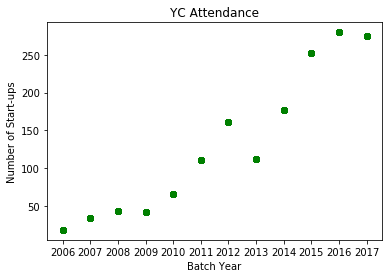

In [7]:
#dropping 2018 & 2005 cause each has only one season
df1= df[(df['batch_year']!='2018') & (df['batch_year']!='2005')]  

plt.scatter(x=df1['batch_year'],y=df1['count_year'], color='green') 
plt.xlabel('Batch Year')
plt.ylabel('Number of Start-ups')
plt.title('YC Attendance')
plt.show()  

As we see here, during the years, the number of start ups joining YC grows, which is probably because of the success of well-known start ups in Bay Area funded by YC.



Q2. YC has two batches every year, winter and summer. Is there any differences in terms of number of attenders among seasons?

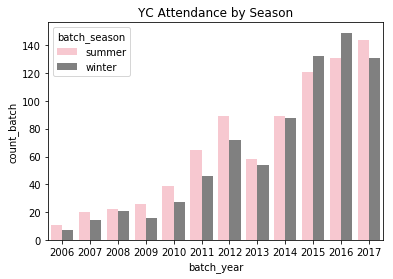

In [8]:
#specifying colors for the seasons
palette ={"grey","pink" }

sns.barplot(x='batch_year', y='count_batch', hue='batch_season', palette=palette , data=df1 )
plt.title('YC Attendance by Season')
plt.show()

Comparison between winter and summer shows that usually summer batches tend to be more popular.

Q3. Gender imbalance has been a concern in the tech world for many years. Do we observe any improvements in this regard among the YC attenders? How does the number of female attenders look like?

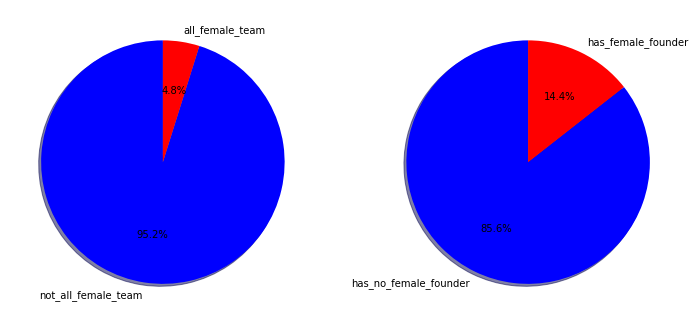

In [9]:
#Combination of female-male attanders
explode=(0,0.1)
plt.figure(figsize=(12,12))

ax1 = plt.subplot(121, aspect='equal')
df['count_all_female']= df.groupby('all_female_team')['all_female_team'].transform('count')
labels = 'not_all_female_team','all_female_team'
plt.pie(df['count_all_female'].value_counts(),labels=labels, colors=['blue','red'],shadow=True , startangle=90,autopct='%1.1f%%')

ax2 = plt.subplot(122, aspect='equal')
df['count_all_has_ff']= df.groupby('female_founder')['female_founder'].transform('count')
labels = 'has_no_female_founder','has_female_founder'
plt.pie(df['count_all_has_ff'].value_counts(),labels=labels, colors=['blue','red'],shadow=True , startangle=90,autopct='%1.1f%%')
plt.show()

Based on the demographic, roughly 5% of the attenders have all female team. The rest of them are combination of either all male attenders or combination of both genders.
Only 14.5% of the start-ups have at least one female founder, whereas, rest of them has only male founders.

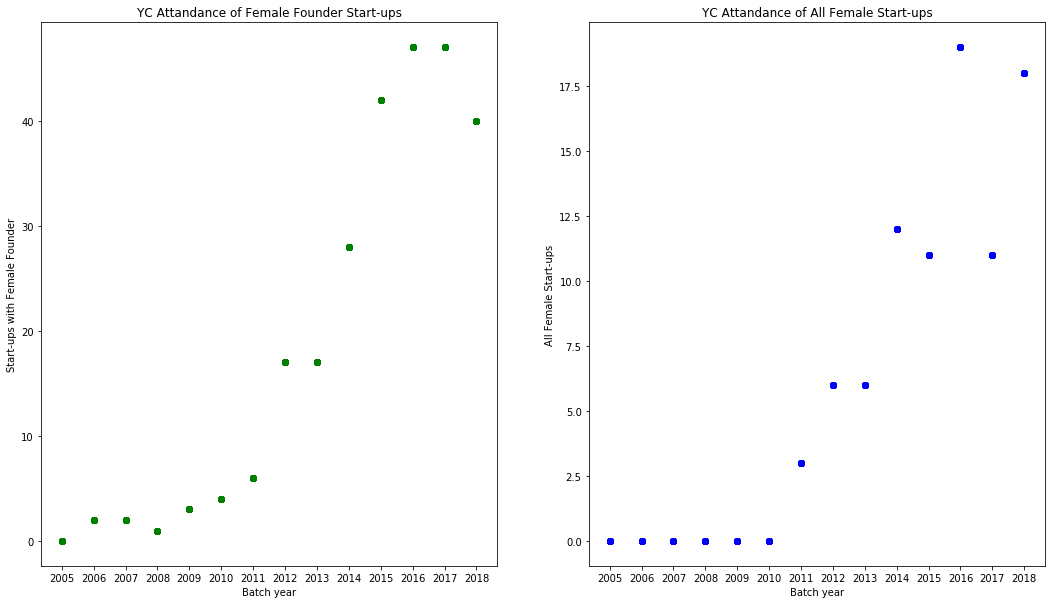

In [14]:
#Plotting number of female founder in each year
explode=(0,0.1)
plt.figure(figsize=(18,10))

ax1 = plt.subplot(121)
df['has_ffemale']= df.groupby('batch_year')['female_founder'].transform('sum')
plt.scatter(x=df['batch_year'],y=df['has_ffemale'], color='green') 
plt.xlabel('Batch year')
plt.ylabel('Start-ups with Female Founder')
plt.title('YC Attandance of Female Founder Start-ups')

#Plotting number of all_female_team in each year
ax2 = plt.subplot(122)
df['allft']= df.groupby('batch_year')['all_female_team'].transform('sum')
plt.scatter(x=df['batch_year'],y=df['allft'], color='blue') 
plt.xlabel('Batch year')
plt.ylabel('All Female Start-ups')
plt.title('YC Attandance of All Female Start-ups')
plt.show()

According to these graphs, during the time both attendance of start-ups with at least one female founder and all female start-ups have grown.

# Future  Work:
I would to add more features to the current dataset in the future. Potential features may include detailed demographic characteristics of the whole team, and status of the start-up after a few years of joining YC. By using random forest models, I can examine the probability of success for a start-up based on the founders’ demographics.